In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

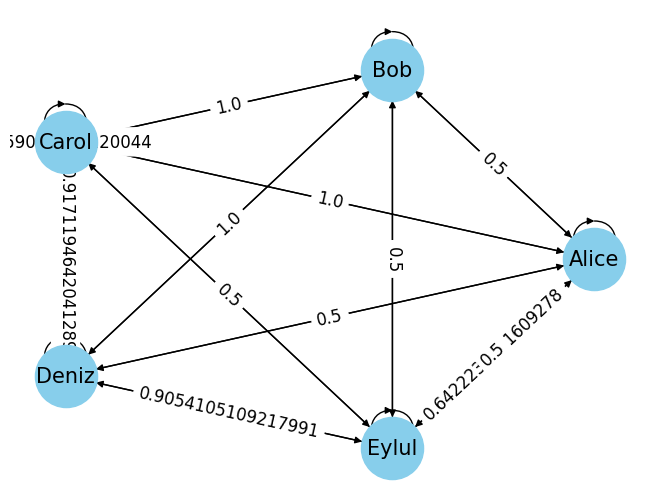

In [ ]:
G = nx.DiGraph()

# Add nodes for 5 individuals
G.add_node("Alice")
G.add_node("Bob")
G.add_node("Carol")
G.add_node("Deniz")
G.add_node("Eylul")
# Given means and variances for the distributions
mean_inter = 0.6
variance_inter = 1
mean_self = 0.8
variance_self = 1

# Function to generate random probabilities with given mean and variance,
# and map values greater than 1 to 1
def random_prob(mean, variance):
    prob = np.random.normal(mean, np.sqrt(variance))
    return np.clip(prob, 0.5, 1)  # Clipping the value between 0 and 1

# Nodes in the graph
nodes = ["Alice", "Bob", "Carol", "Deniz", "Eylul"]

# Initialize an empty list to hold the (source, target, weight) tuples
transitions = []

# Inter-node edges
for i in range(len(nodes)):
    for j in range(len(nodes)):
        if i != j:  # If not a self-edge
            # Append the tuple (source, target, weight) to transitions
            transitions.append((nodes[i], nodes[j], random_prob(mean_inter, variance_inter)))

# Self-edges
for node in nodes:
    # Append the tuple (node, node, weight) to transitions
    transitions.append((node, node, random_prob(mean_self, variance_self)))

# Add edges to the graph
for src, dst, weight in transitions:
    G.add_edge(src, dst, weight=weight)

# Position nodes using a layout
pos = nx.circular_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=15)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Show plot
plt.show()

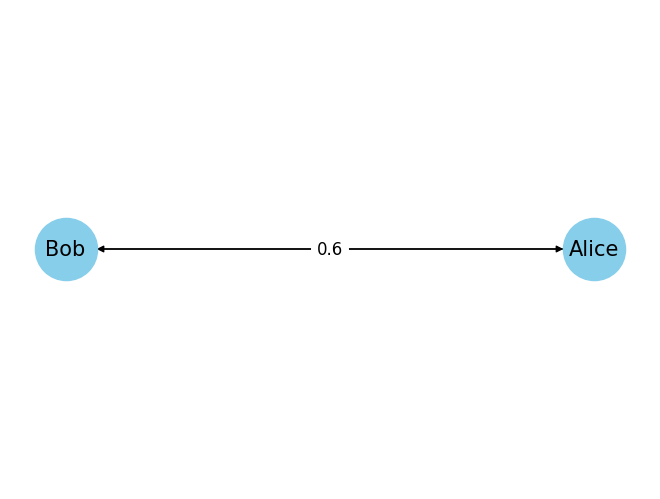

In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes for 5 individuals
G.add_node("Alice")
G.add_node("Bob")
# G.add_node("Carol")
# G.add_node("Deniz")
# G.add_node("Eylul")


transitions = [

    ("Alice", "Alice", 0.5),
    ("Bob", "Bob", 0.5),
    # ("Carol", "Carol", 0.1),
    # ("Deniz", "Deniz", 0.1),
    # ("Eylul", "Eylul", 0.1),

    ("Alice", "Bob", 0.6),
    ("Bob", "Alice", 0.6),

    # ("Bob", "Carol", 0.3),
    # ("Carol", "Bob", 0.3),
    # ("Alice", "Carol", 0.3),
    # ("Carol", "Alice", 0.3),
    # ("Alice", "Eylul", 0.3),
    # ("Eylul", "Alice", 0.3),
    # ("Deniz", "Eylul", 0.3),
    # ("Eylul", "Deniz", 0.3),
    # ("Bob", "Deniz", 0.3),
    # ("Deniz", "Bob", 0.3),
    # ("Carol", "Eylul", 0.3),
    # ("Eylul", "Carol", 0.3),
    # ("Carol", "Deniz", 0.3),
    # ("Deniz", "Carol", 0.3),
    # ("Alice", "Deniz", 0.3),
    # ("Deniz", "Alice", 0.3),
    # ("Bob", "Eylul", 0.3),
    # ("Eylul", "Bob", 0.3),
]

# Add edges to the graph
for src, dst, weight in transitions:
    G.add_edge(src, dst, weight=weight)

# Position nodes using a layout
pos = nx.circular_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=15)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Show plot
plt.show()

In [ ]:
adj_matrix = nx.to_numpy_array(G)
adj_matrix

array([[0.5  , 0.5  , 0.5  , 1.   , 0.642],
       [0.5  , 0.5  , 0.5  , 0.5  , 0.5  ],
       [1.   , 1.   , 0.859, 1.   , 0.5  ],
       [0.5  , 1.   , 0.917, 0.5  , 1.   ],
       [0.5  , 0.5  , 0.5  , 0.905, 0.5  ]])

In [ ]:
# Creating a NumPy array 'nums' containing a set of integers
number_of_nodes = G.number_of_nodes()
states = np.arange(2**number_of_nodes)

# Displaying the original vector 'nums'
print("Original vector:")
print(states)

# Creating a binary representation of 'nums' using bitwise operations and reshaping
# The resultant array represents the binary representation of each element in 'nums'
states = ((states.reshape(-1, 1) & (2 ** np.arange(number_of_nodes))) != 0).astype(int)

# Displaying the binary representation of the vector 'nums'
print("\nBinary representation of the said vector:")
print(states)  # Reversing the columns to display binary digits in the correct order

Original vector:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]

Binary representation of the said vector:
[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 1 0 0 0]
 [1 1 0 0 0]
 [0 0 1 0 0]
 [1 0 1 0 0]
 [0 1 1 0 0]
 [1 1 1 0 0]
 [0 0 0 1 0]
 [1 0 0 1 0]
 [0 1 0 1 0]
 [1 1 0 1 0]
 [0 0 1 1 0]
 [1 0 1 1 0]
 [0 1 1 1 0]
 [1 1 1 1 0]
 [0 0 0 0 1]
 [1 0 0 0 1]
 [0 1 0 0 1]
 [1 1 0 0 1]
 [0 0 1 0 1]
 [1 0 1 0 1]
 [0 1 1 0 1]
 [1 1 1 0 1]
 [0 0 0 1 1]
 [1 0 0 1 1]
 [0 1 0 1 1]
 [1 1 0 1 1]
 [0 0 1 1 1]
 [1 0 1 1 1]
 [0 1 1 1 1]
 [1 1 1 1 1]]


In [ ]:
no_of_states = len(states)
print(f"no of states = {no_of_states}")
P = np.empty((no_of_states,no_of_states))
for i in range(no_of_states):
    for j in range(no_of_states):
        s_init = states[i]
        s_target = states[j]
        p_healthy = np.prod(1-(s_init * adj_matrix), axis=1)
        P[i,j] = np.prod(np.abs(s_target-p_healthy))
np.set_printoptions(precision=3)
print(P)

no of states = 32
[[1.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.062 0.062 0.062]
 [0.    0.    0.    ... 0.125 0.125 0.125]
 ...
 [0.    0.    0.    ... 0.062 0.    0.926]
 [0.    0.    0.    ... 0.062 0.    0.926]
 [0.    0.    0.    ... 0.031 0.    0.963]]


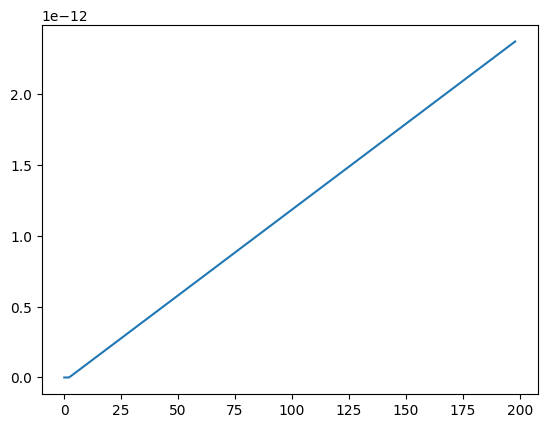

In [ ]:
my_arr = []
for i in range(1,200):
    my_arr.append(np.linalg.matrix_power(P, i)[31,0])
plt.plot(my_arr)

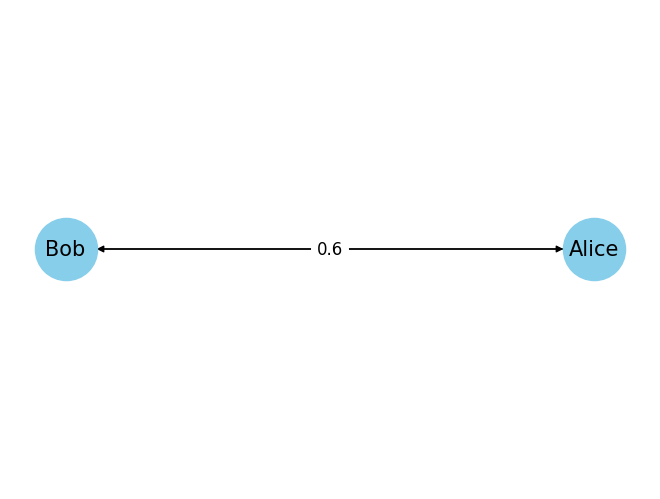

array([[0.5, 0.6],
       [0.6, 0.5]])

In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes for 5 individuals
G.add_node("Alice")
G.add_node("Bob")
#G.add_node("Carol")

# Add edges with weights (transition probabilities)
# Assuming the transitions are between all individuals and themselves
transitions = [
    ("Alice", "Bob", 0.6),
    ("Bob", "Alice", 0.6),
    # Adding self-loops for Deniz and Eylul with arbitrary probabilities
    ("Alice", "Alice", 0.5),
    ("Bob", "Bob", 0.5),
    # ("Carol", "Alice", 0.6),
    # ("Carol", "Bob", 0.6),
    # ("Alice", "Carol", 0.6),
    # ("Bob", "Carol", 0.6),
    # ("Carol", "Carol", 0.5),
]

# Add edges to the graph
for src, dst, weight in transitions:
    G.add_edge(src, dst, weight=weight)

# Position nodes using a layout
pos = nx.circular_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=15)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Show plot
plt.show()

adj_matrix = nx.to_numpy_array(G)
adj_matrix

In [ ]:
# Creating a NumPy array 'nums' containing a set of integers
number_of_nodes = G.number_of_nodes()
states = np.arange(2**number_of_nodes)

# Displaying the original vector 'nums'
print("Original vector:")
print(states)

# Creating a binary representation of 'nums' using bitwise operations and reshaping
# The resultant array represents the binary representation of each element in 'nums'
states = ((states.reshape(-1, 1) & (2 ** np.arange(number_of_nodes))) != 0).astype(int)

# Displaying the binary representation of the vector 'nums'
print("\nBinary representation of the said vector:")
print(states)  # Reversing the columns to display binary digits in the correct order

Original vector:
[0 1 2 3]

Binary representation of the said vector:
[[0 0]
 [1 0]
 [0 1]
 [1 1]]


In [ ]:
no_of_states = len(states)
print(f"no of states = {no_of_states}")
P = np.empty((no_of_states,no_of_states))
for i in range(no_of_states):
    for j in range(no_of_states):
        s_init = states[i]
        s_target = states[j]
        p_healthy = np.prod(1-(s_init * adj_matrix), axis=1)
        P[i,j] = np.prod(np.abs(s_target-p_healthy))
np.set_printoptions(precision=2)
print(P)

no of states = 4
[[1.   0.   0.   0.  ]
 [0.2  0.2  0.3  0.3 ]
 [0.2  0.3  0.2  0.3 ]
 [0.04 0.16 0.16 0.64]]


In [ ]:
P

array([[1.  , 0.  , 0.  , 0.  ],
       [0.2 , 0.2 , 0.3 , 0.3 ],
       [0.2 , 0.3 , 0.2 , 0.3 ],
       [0.04, 0.16, 0.16, 0.64]])

In [ ]:
G_states=nx.from_numpy_array(P)

In [ ]:
G_states.nodes()

NodeView((0, 1, 2, 3))

In [ ]:
mapping = {0:"s0", 1:"s1", 2:"s2", 3:"s3"}#, 4:"s4", 5:"s5", 6:"s6", 7:"s7"}
G_states = nx.relabel_nodes(G_states, mapping, copy=False)

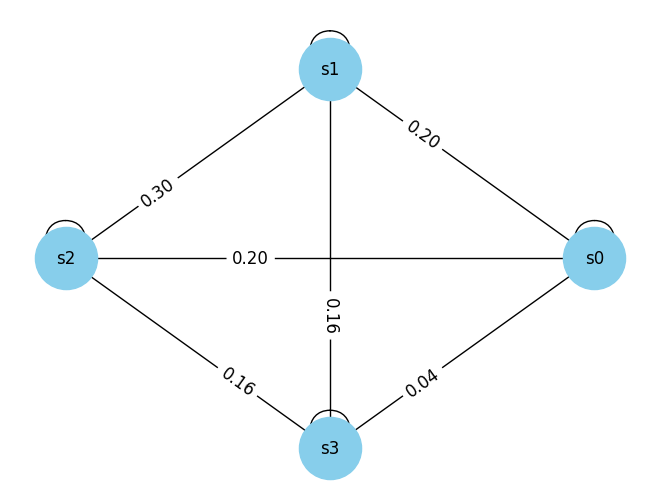

In [ ]:
# Position nodes using a layout
pos = nx.circular_layout(G_states)

# Draw the graph
nx.draw(G_states, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=12)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G_states, 'weight')
edge_labels = dict([((u,v,), f"{d['weight']:.2f}") for u,v,d in G_states.edges(data=True)])
nx.draw_networkx_edge_labels(G_states, pos, edge_labels=edge_labels, font_size=12, label_pos=0.35)

# Show plot
plt.show()

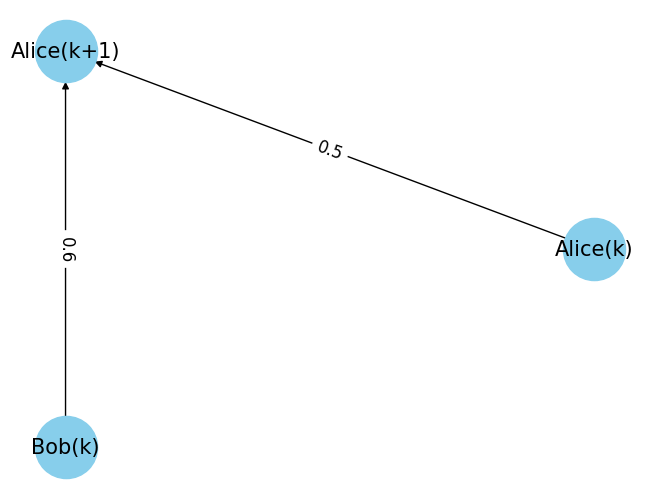

array([[0. , 0.5, 0. ],
       [0. , 0. , 0. ],
       [0. , 0.6, 0. ]])

In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes for 5 individuals
# G.add_node("Alice")
# G.add_node("Bob")
# G.add_node("Carol")

# Add edges with weights (transition probabilities)
# Assuming the transitions are between all individuals and themselves
transitions = [
    ("Alice(k)", "Alice(k+1)", 0.5),
    ("Bob(k)", "Alice(k+1)", 0.6),

]

# Add edges to the graph
for src, dst, weight in transitions:
    G.add_edge(src, dst, weight=weight)

# Position nodes using a layout
pos = nx.circular_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='black', linewidths=1, font_size=15)

# Draw edge labels (weights)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Show plot
plt.show()

adj_matrix = nx.to_numpy_array(G)
adj_matrix